In [ ]:
    # Source:: https://www.udemy.com/course/langgraph-for-beginners/learn/lecture/49184479#overview

In [ ]:
import os
from dotenv import load_dotenv
load_dotenv() 
os.environ["OPENAI_API_KEY"]=os.getenv("OPENAI_API_KEY")

In [ ]:
from typing import TypedDict
from langgraph.graph import StateGraph, END, START
from langchain_openai import ChatOpenAI


# Define state
class MarketResearchState(TypedDict):
    query: str
    trends: str
    competitors: str
    sentiment: str
    summary: str


llm = ChatOpenAI()




In [ ]:
def fetch_trends(state: MarketResearchState):
    response = llm.invoke(f"What are the latest market trends for {state['query']}?")
    return {"trends": response.content}


def analyze_competitors(state: MarketResearchState):
    response = llm.invoke(f"List top competitors in {state['query']} market.")
    return {"competitors": response.content}


def extract_sentiment(state: MarketResearchState):
    response = llm.invoke(f"What do customers feel about products in {state['query']} category?")
    return {"sentiment": response.content}


def summarize(state: MarketResearchState):
    summary_prompt = f"""
    Product Research Summary:
    - Trends: {state.get('trends')}
    - Competitors: {state.get('competitors')}
    - Customer Sentiment: {state.get('sentiment')}
    Provide strategic insights for entering the {state['query']} market.
    """
    response = llm.invoke(summary_prompt)
    return {"summary": response.content}




In [ ]:

graph_builder = StateGraph(MarketResearchState)

# Add nodes
graph_builder.add_node("fetch_trends", fetch_trends)
graph_builder.add_node("analyze_competitors", analyze_competitors)
graph_builder.add_node("extract_sentiment", extract_sentiment)
graph_builder.add_node("summarize", summarize)

# Add edges for parallel execution
graph_builder.add_edge(START, "fetch_trends")
graph_builder.add_edge(START, "analyze_competitors")    
graph_builder.add_edge(START, "extract_sentiment")
graph_builder.add_edge("fetch_trends", "summarize")
graph_builder.add_edge("analyze_competitors", "summarize")  
graph_builder.add_edge("extract_sentiment", "summarize")

# Add edges for sequential execution

# Compile graph
graph = graph_builder.compile()

# Run it


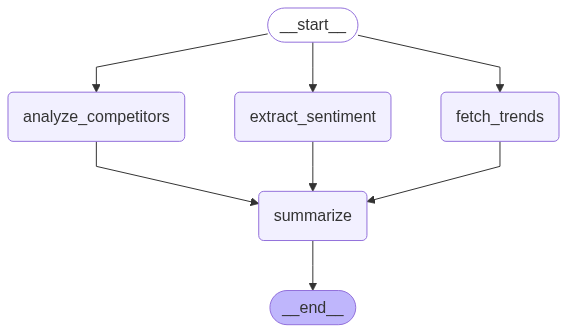

In [ ]:
from IPython.display import Markdown, display, Image

display(Image(graph.get_graph(xray=True).draw_mermaid_png()))

In [ ]:
inputs = {"query": "Organic plastic bottles"}
result = graph.invoke(inputs)

# Output
print("\n=== Final Market Summary ===\n")
print(result["summary"])


=== Final Market Summary ===

1. Differentiation: To stand out in the competitive market for organic plastic bottles, it is important to focus on differentiating your product from competitors. This can be done through unique packaging designs, innovative materials, or special features that offer added value to customers. Highlighting the sustainability and environmental benefits of your product can also help attract conscious consumers.

2. Partnerships: Collaborating with retailers, distributors, or other brands that share similar values can help expand your reach and increase brand visibility in the market. Partnering with organizations focused on sustainability or eco-friendly initiatives can also help establish credibility and trust with consumers.

3. Marketing Strategy: Utilize social media platforms, online advertising, and influencer partnerships to promote your organic plastic bottles. Highlight the benefits of your product, such as being biodegradable, recyclable, or made fr